# 2022-2023 Football Stats Introduction

## About the Data

In this project, we will combine two datasets: the first one is [2022-2023 Football Team Stats](https://www.kaggle.com/datasets/vivovinco/20222023-football-team-stats) and the second one is [2022-2023 Football Player Stats](https://www.kaggle.com/datasets/vivovinco/20222023-football-player-stats).
hese two dataset contain stats for players and teams in the 2022-2023 season.

The first dataset contains 2022-2023 football team stats and the second one contains 2022-2023 football player stats. 
the data is limited these top 5 leagues: Premier League, Ligue 1, Bundesliga, Serie A and La Liga.

## Dataset Overview

The datasets focus on a variety of statistics for both teams and players. Below is a brief overview of each dataset's contents.

### Player Stats (`player_stats.csv`)

This file contains detailed performance metrics for players, including:

- **Basic Information**: Player's name, nation, position, squad, league, age, and birth year.
- **Playing Time**: Matches played, starts, minutes played.
- **Offensive Stats**: Goals, shots, shots on target, pass completion rates.
- **Defensive Metrics**: Tackles, interceptions, clearances.
- **Passing**: Total passes attempted/completed, passing distances, types of passes.
- **Advanced Metrics**: Shot-creating actions, goal-creating actions, dribbles, carries.

### FIFA 23 Stats (`fifa_player_stats.csv`)

This dataset provides detailed FIFA 23 stats for players (which is based on the 2022-2023 season). it covers a wide range of attributes:

- **Basic Information**: Known As, Full Name, Age, Nationality, Image Link.
- **Physical Attributes**: Height, Weight.
- **Club and National** Team Details: Club Name, Wage, Release Clause, Contract Details, National Team Information.
- **Player Abilities**: Overall rating, Potential, Position-specific ratings, Skill Moves, Weak Foot Rating.
- **Performance Metrics**: Pace, Shooting, Passing, Dribbling, Defending, Physicality, Goalkeeping skills.


### Team Stats (`team_stats.csv`)

For teams, the dataset includes:

- **Ranking and Results**: Squad rank, wins, draws, losses, goals for/against, points.
- **Expected Goals (xG)**: xG, xGA (expected goals against), xGD (expected goal difference).
- **Attendance**: Average attendance per game (home matches).
- **Key Players**: Top team scorer, most played goalkeeper.

## 1.1: We will first start by loading the data :

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')

# loading the data
playerStatsDf = pd.read_csv('dataset/player_stats.csv', encoding='ISO-8859-1', delimiter=';')
teamStatsDf = pd.read_csv('dataset/team_stats.csv', encoding='ISO-8859-1', delimiter=';')
fifaPlayersDf = pd.read_csv('dataset/fifa_player_stats.csv')


In [73]:
fifaPlayersDf

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


In [77]:
import pandas as pd
import re

# Function to find matching full name by escaping regex special characters
def find_full_name(player_name, df):
    # Safely escape regex special characters in player_name
    escaped_name = re.escape(player_name)
    # Find a full name that contains the escaped player name as a substring
    match = df[df['Full Name'].str.contains(escaped_name, case=False, na=False)]
    if not match.empty:
        return match['Full Name'].iloc[0]  # Return the first match
    return None  # Return None if no match is found

# Apply the function to create a new column for the full names in playerStatsDf
playerStatsDf['Full Name'] = playerStatsDf['Player'].apply(lambda x: find_full_name(x, fifaPlayersDf))

# Now perform the merge
playerStatsDf = playerStatsDf.merge(fifaPlayersDf, on='Full Name', how='left')


KeyError: 'Overall'

## 1.2:  We will explore the columns of the dataframes

In [2]:
playerStatsDf.head(10)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.00,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.00,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.00,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.00,0.35,0.80,0.00,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.00,0.23,2.02,0.00,0.0,0.00,6.51,0.31,0.39,44.4
5,6,Oliver Abildgaard,DEN,MF,Hellas Verona,Serie A,26,1996,1,0,...,0.00,0.00,10.00,0.00,0.0,0.00,10.00,0.00,10.00,0.0
6,7,Matthis Abline,FRA,FWMF,Auxerre,Ligue 1,19,2003,5,2,...,0.48,0.95,0.48,0.00,0.0,0.00,0.48,1.43,1.43,50.0
7,8,Matthis Abline,FRA,FWMF,Rennes,Ligue 1,19,2003,11,0,...,0.83,1.67,0.83,0.83,0.0,0.00,1.67,0.83,3.33,20.0
8,9,Abner,BRA,DF,Betis,La Liga,22,2000,4,3,...,0.00,1.33,2.33,0.00,0.0,0.00,6.00,1.00,2.00,33.3
9,10,Zakaria Aboukhlal,MAR,FWMF,Toulouse,Ligue 1,22,2000,22,17,...,0.72,0.96,0.72,0.00,0.0,0.00,4.43,0.42,1.32,24.1


In [3]:
playerStatsDf.describe()

,Rk,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
count,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,...,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000
mean,1345.000000,26.011157,1996.155820,11.833023,8.476013,760.451097,8.450465,1.027520,1.245787,0.411261,...,0.204697,1.661636,0.990569,0.009249,0.015173,0.003142,4.951967,1.312064,1.497356,43.583600
std,776.391761,4.446259,4.450108,6.864278,6.994383,591.094260,6.567484,2.013714,1.424619,0.754716,...,0.552376,2.319000,1.235965,0.043781,0.077399,0.022607,2.901833,1.579539,1.830391,26.673092
min,1.000000,15.000000,1981.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,673.000000,23.000000,1993.000000,5.000000,2.000000,194.000000,2.200000,0.000000,0.260000,0.000000,...,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,3.330000,0.330000,0.550000,27.600000
50%,1345.000000,26.000000,1996.000000,13.000000,7.000000,684.000000,7.600000,0.000000,0.860000,0.180000,...,0.000000,0.760000,0.830000,0.000000,0.000000,0.000000,5.000000,0.930000,1.100000,46.400000
75%,2017.000000,29.000000,2000.000000,18.000000,14.000000,1245.000000,13.800000,1.000000,1.850000,0.590000,...,0.210000,2.500000,1.320000,0.000000,0.000000,0.000000,6.270000,1.790000,1.830000,60.000000
max,2689.000000,41.000000,2007.000000,23.000000,23.000000,2070.000000,23.000000,25.000000,15.000000,10.000000,...,10.000000,30.000000,20.000000,0.870000,2.000000,0.500000,30.000000,25.000000,30.000000,100.000000


In [4]:
# display all the possible columns of Pos
playerStatsDf['Pos'].unique()

array(['MFFW', 'DF', 'MF', 'FWMF', 'FW', 'DFFW', 'MFDF', 'GK', 'DFMF',
       'FWDF'], dtype=object)

In [5]:
pd.set_option('display.max_seq_items', None)
print(playerStatsDf.columns)
pd.reset_option('display.max_seq_items')

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Goals', 'Shots', 'SoT', 'SoT%', 'G/Sh',
       'G/SoT', 'ShoDist', 'ShoFK', 'ShoPK', 'PKatt', 'PasTotCmp', 'PasTotAtt',
       'PasTotCmp%', 'PasTotDist', 'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt',
       'PasShoCmp%', 'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp',
       'PasLonAtt', 'PasLonCmp%', 'Assists', 'PasAss', 'Pas3rd', 'PPA',
       'CrsPA', 'PasProg', 'PasAtt', 'PasLive', 'PasDead', 'PasFK', 'TB', 'Sw',
       'PasCrs', 'TI', 'CK', 'CkIn', 'CkOut', 'CkStr', 'PasCmp', 'PasOff',
       'PasBlocks', 'SCA', 'ScaPassLive', 'ScaPassDead', 'ScaDrib', 'ScaSh',
       'ScaFld', 'ScaDef', 'GCA', 'GcaPassLive', 'GcaPassDead', 'GcaDrib',
       'GcaSh', 'GcaFld', 'GcaDef', 'Tkl', 'TklWon', 'TklDef3rd', 'TklMid3rd',
       'TklAtt3rd', 'TklDri', 'TklDriAtt', 'TklDri%', 'TklDriPast', 'Blocks',
       'BlkSh', 'BlkPass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Touches',
       'TouD

# 1.3 preprocessing the players dataset

In [6]:
acronyms = {"Rk": "Rank", "Player": "Player's name", "Nation": "Player's nation", "Pos": "Position",
            "Squad": "Squad’s name", "Comp": "League that squat occupies", "Age": "Player's age",
            "Born": "Year of birth", "MP": "Matches played", "Starts": "Matches started",
            "Min": "Minutes played", "90s": "Minutes played divided by 90", 
            "Goals": "Goals scored or allowed", 
            "Shots": "Shots total (Does not include penalty kicks)", 
            "SoT": "Shots on target (Does not include penalty kicks)", 
            'SoT%': 'Shots on target percentage (Does not include penalty kicks)',
            'G/Sh': 'Goals per shot', 
            'G/SoT': 'Goals per shot on target (Does not include penalty kicks)', 
            'ShoDist': 'Average distance, in yards, from goal of all shots taken (Does not include penalty kicks)',
            'ShoFK': 'Shots from free kicks', 
            'ShoPK': 'Penalty kicks made',
            "PasProg":"Completed passes that move the ball towards the opponent's goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area",
                  "PasAtt":"Passes attempted",
                  "PasLive":"Live-ball passes",
                  "PasDead":"Dead-ball passes",
                  "PasFK":"Passes attempted from free kicks",
                  "TB":"Completed pass sent between back defenders into open space",
                  "Sw":"Passes that travel more than 40 yards of the width of the pitch",
                  "PasCrs":"Crosses",
                  "TI":"Throw-Ins taken",
                  "CK":"Corner kicks",
                  "CkIn":"Inswinging corner kicks",
                  "CkOut":"Outswinging corner kicks",
                  "CkStr":"Straight corner kicks",
                  "PasCmp":"Passes completed",
                  "PasOff":"Offsides",
                  "PasBlocks":"Blocked by the opponent who was standing it the path",
                  "SCA":"Shot-creating actions",
                  "ScaPassLive":"Completed live-ball passes that lead to a shot attempt",
                  "ScaPassDead":"Completed dead-ball passes that lead to a shot attempt",
                  "ScaDrib":"Successful dribbles that lead to a shot attempt",
                  "ScaSh":"Shots that lead to another shot attempt",
                  "ScaFld":"Fouls drawn that lead to a shot attempt",
                  "ScaDef":"Defensive actions that lead to a shot attempt",
                  "GCA":"Goal-creating actions",
                  "GcaPassLive":"Completed live-ball passes that lead to a goal",
                  "GcaPassDead":"Completed dead-ball passes that lead to a goal",
                  "GcaDrib":"Successful dribbles that lead to a goal",
                  "GcaSh":"Shots that lead to another goal-scoring shot",
                  "GcaFld":"Fouls drawn that lead to a goal",
                  "GcaDef":"Defensive actions that lead to a goal",
                  "Tkl":"Number of players tackled",
                  "TklWon":"Tackles in which the tackler's team won possession of the ball",
                  "TklDef3rd":"Tackles in defensive 1/3",
                  "TklMid3rd":"Tackles in middle 1/3",
                  "TklAtt3rd":"Tackles in attacking 1/3",
                  "TklDri":"Number of dribblers tackled",
                  "TklDriAtt":"Number of times dribbled past plus number of tackles",
                  "TklDri%":"Percentage of dribblers tackled",
                  "TklDriPast":"Number of times dribbled past by an opposing player",
                  "Blocks":'Number of times blocking the ball by standing in its path',
                 'BlkSh':'Number of times blocking a shot by standing in its path',
            'PKatt': 'Penalty kicks attempted', 
            'PasTotCmp': 'Passes completed', 
            'PasTotAtt': 'Passes attempted', 
            'PasTotCmp%': 'Pass completion percentage', 
            'PasTotDist': 'Total distance, in yards, that completed passes have traveled in any direction',
            'PasTotPrgDist': 'Total distance, in yards, that completed passes have traveled towards the opponent\'s goal',
            'PasShoCmp': 'Passes completed (Passes between 5 and 15 yards)', 
            'PasShoAtt': 'Passes attempted (Passes between 5 and 15 yards)', 
            'PasShoCmp%': 'Pass completion percentage (Passes between 5 and 15 yards)',
            'PasMedCmp': 'Passes completed (Passes between 15 and 30 yards)', 
            'PasMedAtt': 'Passes attempted (Passes between 15 and 30 yards)', 
            'PasMedCmp%': 'Pass completion percentage (Passes between 15 and 30 yards)',
            'PasLonCmp': 'Passes completed (Passes longer than 30 yards)', 
            'PasLonAtt': 'Passes attempted (Passes longer than 30 yards)', 
            'PasLonCmp%': 'Pass completion percentage (Passes longer than 30 yards)',
            'Assists': 'Assists', 
            'PasAss': 'Passes that directly lead to a shot (assisted shots)', 
            'Pas3rd': 'Completed passes that enter the 1/3 of the pitch closest to the goal',
             "PPA" : "Completed passes into the 18-yard box",
            "CrsPA" : "Completed crosses into the 18-yard box",
           "BlkPass":"Number of times blocking a pass by standing in its path",
                  "Int":"Interceptions",
                  "Tkl+Int":"Number of players tackled plus number of interceptions",
                  "Clr":"Clearances",
                  "Err":"Mistakes leading to an opponent's shot",
                  "Touches":"Number of times a player touched the ball. Note: Receiving a pass, then dribbling, then sending a pass counts as one touch",
                  "TouDefPen":"Touches in defensive penalty area",
                  "TouDef3rd":"Touches in defensive 1/3",
                  "TouMid3rd":"Touches in middle 1/3",
                  "TouAtt3rd":"Touches in attacking 1/3",
                  "TouAttPen":"Touches in attacking penalty area",
                  "TouLive":"Live-ball touches. Does not include corner kicks, free kicks, throw-ins, kick-offs, goal kicks or penalty kicks.",
                  "ToAtt":"Number of attempts to take on defenders while dribbling",
                  "ToSuc":"Number of defenders taken on successfully, by dribbling past them",
                  "ToSuc%":"Percentage of take-ons Completed Successfully",
                  "ToTkl":"Number of times tackled by a defender during a take-on attempt",
                  "ToTkl%":"Percentage of time tackled by a defender during a take-on attempt",
                  "Carries":"Number of times the player controlled the ball with their feet",
                  "CarTotDist":"Total distance, in yards, a player moved the ball while controlling it with their feet, in any direction",
                  "CarPrgDist":"Total distance, in yards, a player moved the ball while controlling it with their feet towards the opponent's goal",
                  "CarProg":"Carries that move the ball towards the opponent's goal at least 5 yards, or any carry into the penalty area",
                  "Car3rd":"Carries that enter the 1/3 of the pitch closest to the goal",
                  "CPA":"Carries into the 18-yard box",
                  "CarMis":"Number of times a player failed when attempting to gain control of a ball",
                  "CarDis":"Number of times a player loses control of the ball after being tackled by an opposing player",
                  "Rec":"Number of times a player successfully received a pass",
           "RecProg" : 
            "Completed passes that move the ball towards the opponents goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area Make this a dictionary",
           "CrdY":"Yellow cards",
                  "CrdR":"Red cards",
                  "2CrdY":"Second yellow card",
                  "Fls":"Fouls committed",
                  "Fld":"Fouls drawn",
                  "Off":"Offsides",
                  "Crs":"Crosses",
                  "TklW":"Tackles in which the tackler's team won possession of the ball",
                  "PKwon":"Penalty kicks won",
                  "PKcon":"Penalty kicks conceded",
                  "OG":"Own goals",
                  "Recov":"Number of loose balls recovered",
                  "AerWon":"Aerials won",
                  "AerLost":"Aerials lost",
                  "AerWon%":"Percentage of aerials won",
           }
def get_feature_meaning(feature):
    return acronyms[feature]


In [7]:
def get_team_ranking(row):
    teams = row['Squad']
    # Ensure teams is a list, even if it's a single team entry
    if not isinstance(teams, list):
        teams = [teams]

    ranks = []
    for team in teams:
        team_rank = teamStatsDf[teamStatsDf['Squad'] == team]['LgRk']
        if not team_rank.empty:
            ranks.append(team_rank.iloc[0])

    if not ranks:  # Check if list is empty (no valid ranks found)
        print(f"No valid ranks found for {teams}")
        return 0
    else:
        return sum(ranks) / len(ranks)  # Calculate mean rank

playerStatsDf['TeamRank'] = playerStatsDf.apply(get_team_ranking, axis=1)



unifying stats for players who switched clubs in the season

In [8]:
playing_time = ["MP", "Starts", "Min"]
forward_features = ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist","SoT%", "GCA", "SCA", "Off", "PKwon", "ScaDrib", "Assists",
                    "ScaPassLive", "Car3rd", "ScaFld", "ToAtt", "ToSuc","ToSuc%", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "CarMis", "CarDis"]
midfielder_features = ["Goals","PasTotCmp", "PasTotCmp%", "PasTotDist", "PasTotPrgDist", "Assists", "PasAss", "Pas3rd", "Crs", "PasCmp", 
                       "PasOff", "PasBlocks", "SCA","PPA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive", 
                       "GcaPassDead","PasProg", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", 
                       "TklDriAtt", "TklDri%", "TklDriPast", "Blocks", "BlkSh", "Int", "Recov", "Carries", "CarTotDist", "CarPrgDist" , "Fld"]
defender_features = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDriPast", "Blocks", 
                     "BlkSh", "Int", "Tkl+Int", "Recov", "AerWon","AerWon%", "AerLost", "Carries", "CarTotDist", "CarPrgDist", "CrdY", "CrdR","Fls", "Clr"]

features_sum = ["Goals", "MP", "Starts", "Min", "Assists"]
def player_unify(df):
    
    '''There are players who transfer midseason, they will have 2 entries but I only want 1 entry'''
    
    all_players = list(df["Player"].values)
    columns = list(df.columns)
    
    playercnt_dict = {}
    for i in range(len(all_players)):
        if all_players[i] not in playercnt_dict.keys():
            playercnt_dict[all_players[i]] = 1
        else:
            playercnt_dict[all_players[i]] += 1
            
    player_switchclub = []
    for x in playercnt_dict.keys():
        if playercnt_dict[x] >= 2:
            player_switchclub.append(x)
            
    player_new_dict = {}
    df_result = df
    for i in range(len(player_switchclub)):
        player_new = []
        player_old = df[df["Player"] == player_switchclub[i]].values
        for j in range(len(columns)):
            if columns[j] == "Squad":
                new_input = []
                for k in range(player_old.shape[0]):
                    new_input.append(player_old[k, j])
                player_new.append(new_input)
            elif columns[j] == "Squad":
                new_input = ""
                for k in range(player_old.shape[0]):
                    new_input += player_old[k, j]
                    new_input += "/"
                player_new.append(new_input)
            elif columns[j] in features_sum:
                new_input = 0
                for k in range(player_old.shape[0]):
                    new_input += player_old[k, j]
                player_new.append(new_input)
            elif columns[j] in forward_features + midfielder_features + defender_features:
                new_input = 0
                for k in range(player_old.shape[0]):
                    new_input += player_old[k, j]
                new_input /= player_old.shape[0]
                player_new.append(new_input)
            else:
                player_new.append(player_old[0, j])
        player_new_dict[player_switchclub[i]] = player_new
        df_result = df_result.drop(df_result[df_result['Player'] == player_switchclub[i]].index)
    df_unify = pd.DataFrame(player_new_dict)
    df_unify = df_unify.transpose().reset_index(drop=True)
    df_unify.columns = columns
    df_result = pd.concat([df_result, df_unify], axis=0)
    
    return df_result, player_switchclub

playerStatsDf, player_swichclub =player_unify(playerStatsDf)

In [9]:
playerStatsDf

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,TeamRank
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,2.54,0.51,0.0,0.0,0.0,4.86,0.34,1.19,22.2,16.0
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.18,1.59,0.0,0.0,0.0,6.64,2.18,1.23,64.0,8.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,1.05,1.4,0.0,0.0,0.0,8.14,0.93,1.05,47.1,20.0
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.35,0.8,0.0,0.0,0.05,6.6,0.5,0.5,50.0,2.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.23,2.02,0.0,0.0,0.0,6.51,0.31,0.39,44.4,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2647,Denis Zakaria,SUI,MF,"[Chelsea, Juventus]",Premier League,26,1996,6,5,...,1.07,0.94,0.0,0.0,0.0,4.6,0.0,0.155,0.0,11.0
155,2656,Alessandro Zanoli,ITA,DFMF,"[Sampdoria, Napoli]",Serie A,22,2000,6,0,...,7.5,0.71,0.0,0.0,0.0,2.5,0.355,6.07,12.5,20.0
156,2661,Akim Zedadka,ALG,DF,"[Auxerre, Lille]",Ligue 1,27,1995,14,10,...,2.44,1.82,0.0,0.18,0.0,6.255,1.46,1.365,51.45,14.0
157,2679,Nadir Zortea,ITA,DFMF,"[Atalanta, Sassuolo]",Serie A,23,1999,10,2,...,4.0,2.0,0.0,0.0,0.0,6.3,1.5,1.2,58.3,7.0


In [10]:
teamStatsDf

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
0,1,Barcelona,ESP,1,29,23,4,2,53,9,44,73,2.52,55.9,22.7,33.2,1.14,83148,Robert Lewandowski - 17,Marc-André ter Stegen
1,2,Napoli,ITA,1,30,24,3,3,66,21,45,75,2.50,53.2,25.3,27.9,0.93,25662,Victor Osimhen - 21,Alex Meret
2,3,Paris S-G,FRA,1,32,24,3,5,75,31,44,75,2.34,64.7,39.1,25.7,0.80,40508,Kylian Mbappé - 22,Gianluigi Donnarumma
3,4,Arsenal,ENG,1,32,23,6,3,77,34,43,75,2.34,64.1,34.7,29.4,0.92,60203,Martinelli - 15,Aaron Ramsdale
4,5,Manchester City,ENG,2,30,22,4,4,78,28,50,70,2.33,63.5,24.5,39.0,1.30,53203,Erling Haaland - 32,Ederson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Ajaccio,FRA,19,31,6,3,22,22,58,-36,21,0.68,34.2,42.6,-8.4,-0.27,6422,Youcef Belaïli Mounaim El Idrissy - 6,Benjamin Leroy
94,95,Cremonese,ITA,19,30,3,10,17,27,54,-27,19,0.63,31.7,53.7,-22.0,-0.73,7651,Cyriel Dessers Daniel Ciofani - 6,Marco Carnesecchi
95,96,Sampdoria,ITA,20,31,3,8,20,20,52,-32,17,0.55,27.8,51.3,-23.5,-0.76,12107,Manolo Gabbiadini - 6,Emil Audero
96,97,Elche,ESP,20,29,2,7,20,20,59,-39,13,0.45,25.5,56.7,-31.1,-1.07,20872,Pere Milla - 6,Édgar Badía


we will add a column that gives us the player's team ranking in the league

In [11]:
def get_team_ranking(row):
    teams = row['Squad']
    # Ensure teams is a list, even if it's a single team entry
    if not isinstance(teams, list):
        teams = [teams]

    ranks = []
    for team in teams:
        team_rank = teamStatsDf[teamStatsDf['Squad'] == team]['LgRk']
        if not team_rank.empty:
            ranks.append(team_rank.iloc[0])

    if not ranks:  # Check if list is empty (no valid ranks found)
        print(f"No valid ranks found for {teams}")
        return 0
    else:
        return sum(ranks) / len(ranks)  # Calculate mean rank

playerStatsDf['TeamRank'] = playerStatsDf.apply(get_team_ranking, axis=1)



In [12]:
scaler = MinMaxScaler()
playerRadarDf = scaler.fit_transform(playerStatsDf[np.unique(playing_time + forward_features + midfielder_features + defender_features+["TeamRank"])])
playerRadarDf = pd.DataFrame(playerRadarDf)
playerRadarDf.columns = np.unique(playing_time + forward_features + midfielder_features + defender_features+["TeamRank"])
playerStatsDf.reset_index(drop=True, inplace=True)
playerRadarDf.reset_index(drop=True, inplace=True)
playerRadarDf = pd.concat([playerStatsDf[["Player", "Pos", "Comp","Nation"]], playerRadarDf], axis=1)
df_outliers = playerStatsDf[playerStatsDf["MP"] < 10]
outlier_players = list(df_outliers["Player"].values)
df_outliers_radar = playerRadarDf[playerRadarDf["Player"].isin(outlier_players)]
df_players = playerStatsDf[~playerStatsDf["Player"].isin(outlier_players)]
playerRadarDf = playerRadarDf[~playerRadarDf["Player"].isin(outlier_players)]

In [13]:
teamStatsDf.head(5)

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper
0,1,Barcelona,ESP,1,29,23,4,2,53,9,44,73,2.52,55.9,22.7,33.2,1.14,83148,Robert Lewandowski - 17,Marc-André ter Stegen
1,2,Napoli,ITA,1,30,24,3,3,66,21,45,75,2.50,53.2,25.3,27.9,0.93,25662,Victor Osimhen - 21,Alex Meret
2,3,Paris S-G,FRA,1,32,24,3,5,75,31,44,75,2.34,64.7,39.1,25.7,0.80,40508,Kylian Mbappé - 22,Gianluigi Donnarumma
3,4,Arsenal,ENG,1,32,23,6,3,77,34,43,75,2.34,64.1,34.7,29.4,0.92,60203,Martinelli - 15,Aaron Ramsdale
4,5,Manchester City,ENG,2,30,22,4,4,78,28,50,70,2.33,63.5,24.5,39.0,1.30,53203,Erling Haaland - 32,Ederson


# 2: let's start by exploring the teams dataset:

# 2.1: visualizing goals scored and conceded by every team

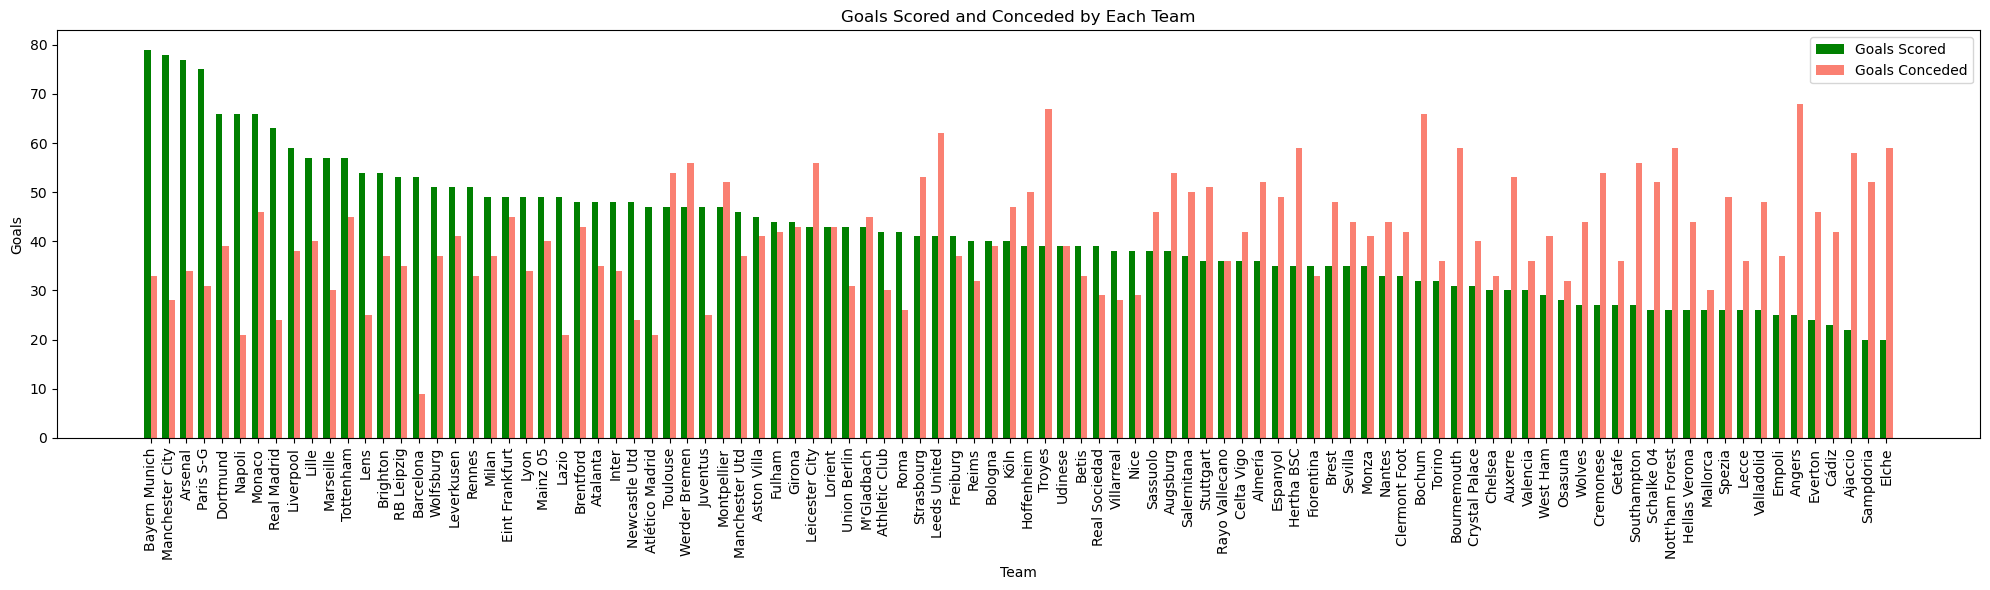

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

teamStatsDf_sorted = teamStatsDf.sort_values(by='GF', ascending=False).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(20, 6))
index = np.arange(len(teamStatsDf_sorted['Squad'])) 
bar_width = 0.35

ax.bar(index, teamStatsDf_sorted['GF'], bar_width, label='Goals Scored', color='green')
ax.bar(index + bar_width, teamStatsDf_sorted['GA'], bar_width, label='Goals Conceded', color='salmon')

ax.set_xlabel('Team')
ax.set_ylabel('Goals')
ax.set_title('Goals Scored and Conceded by Each Team')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(teamStatsDf_sorted['Squad'], rotation=90) 
ax.legend()

plt.tight_layout()
plt.show()


#  2.2: what are the countries that have the most fans ? 

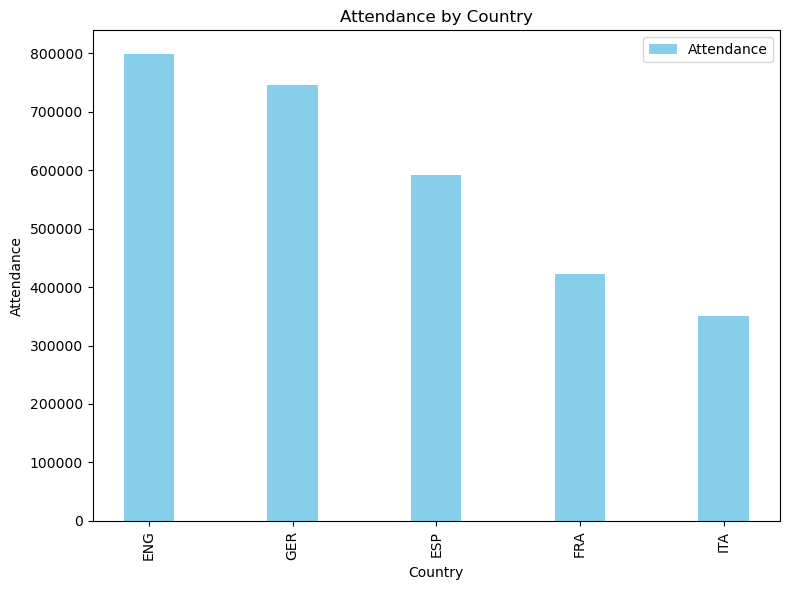

In [15]:
teamStatsDf_grouped = teamStatsDf.groupby('Country').sum().reset_index()
teamStatsDf_grouped_sorted = teamStatsDf_grouped.sort_values(by='Attendance', ascending=False).reset_index(drop=True)


fig, ax = plt.subplots(figsize=(8, 6))
index = np.arange(len(teamStatsDf_grouped_sorted['Country']))


ax.bar(index, teamStatsDf_grouped_sorted['Attendance'], bar_width, label='Attendance', color='skyblue')

ax.set_xlabel('Country')
ax.set_ylabel('Attendance')
ax.set_title('Attendance by Country')
ax.set_xticks(index)

ax.set_xticklabels(teamStatsDf_grouped_sorted['Country'], rotation=90)
ax.legend()


plt.tight_layout()
plt.show()


# 2.3 : what are the best teams in terms of league points ? 

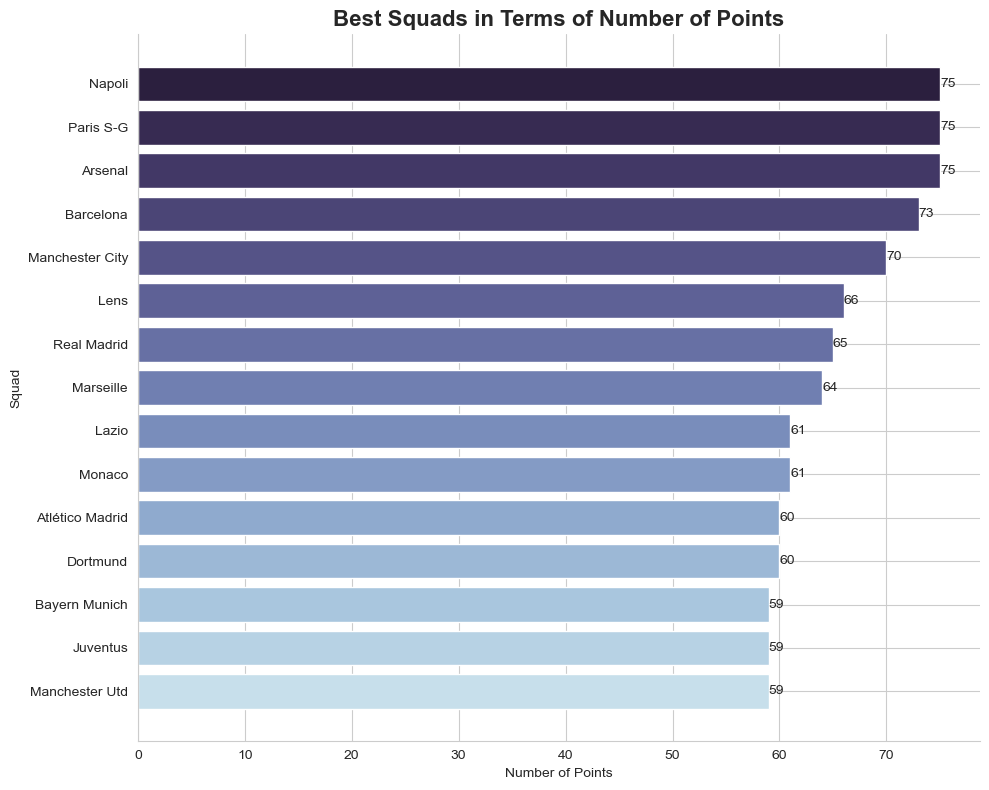

In [16]:
sns.set_style("whitegrid")

teamStatsDf_sorted = teamStatsDf.sort_values(by="Pts", ascending=True)

teamStatsDf_sorted= teamStatsDf_sorted.tail(15)

# Creating the horizontal bar plot
plt.figure(figsize=(10, 8))
bars = plt.barh(teamStatsDf_sorted['Squad'], teamStatsDf_sorted['Pts'], color=sns.color_palette("ch:s=.25,rot=-.25", n_colors=15))

# Adding the data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width()}',
             va='center', ha='left')

# Adding titles and labels
plt.xlabel('Number of Points')
plt.ylabel('Squad')
plt.title('Best Squads in Terms of Number of Points', fontsize=16, fontweight='bold')

sns.despine()

plt.tight_layout()
plt.show()


# 2.4: what are the best teams in term of attendance ? 

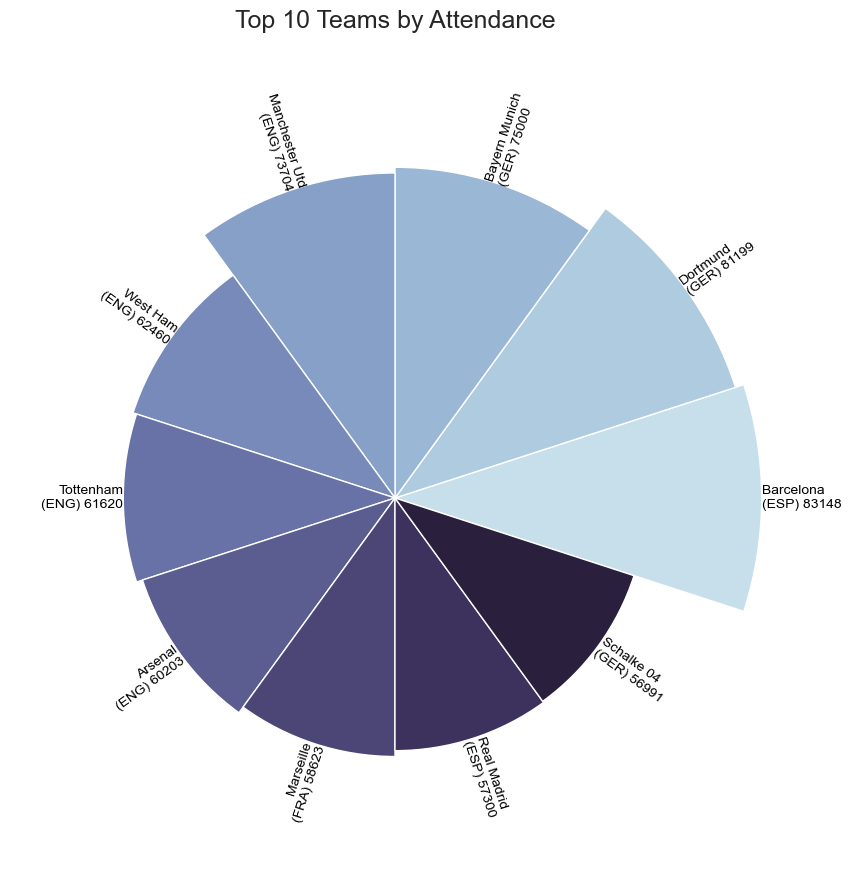

In [17]:
top_teams = teamStatsDf.nlargest(10, 'Attendance')
sns.set_style('whitegrid')

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
ax.grid(False)
plt.axis("off")

fontlabels = {
    'family': 'Arial',
    'color': 'black',
    'size': '10',
}

heights = top_teams["Attendance"]
width = 2 * np.pi / len(top_teams)
angles = [element * width for element in range(len(top_teams))]
labels = [f'{row.Squad}\n({row.Country}) {row.Attendance}' for index, row in top_teams.iterrows()] 
colors = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)(np.linspace(0, 1, len(top_teams)))

bars = ax.bar(x=angles, height=heights, width=width, linewidth=1, edgecolor='white', color=colors)

labelpadding = 20
for bar, angle, label in zip(bars, angles, labels):
    rotation = np.rad2deg(angle)
    alignment = "right" if (angle > np.pi / 2) and (angle < 3 * np.pi / 2) else "left"
    rotation += 180 if alignment == "right" else 0
    ax.text(x=angle, y=bar.get_height() + labelpadding, s=label,
            ha=alignment, va='center', rotation=rotation, rotation_mode='anchor',
            fontdict=fontlabels)

ax.set_title("Top 10 Teams by Attendance", fontdict={'fontsize': 18, 'fontfamily': 'Arial'}, loc='center', y=1.1)
plt.show()


# 2.5: what are the leagues with the most goals ?

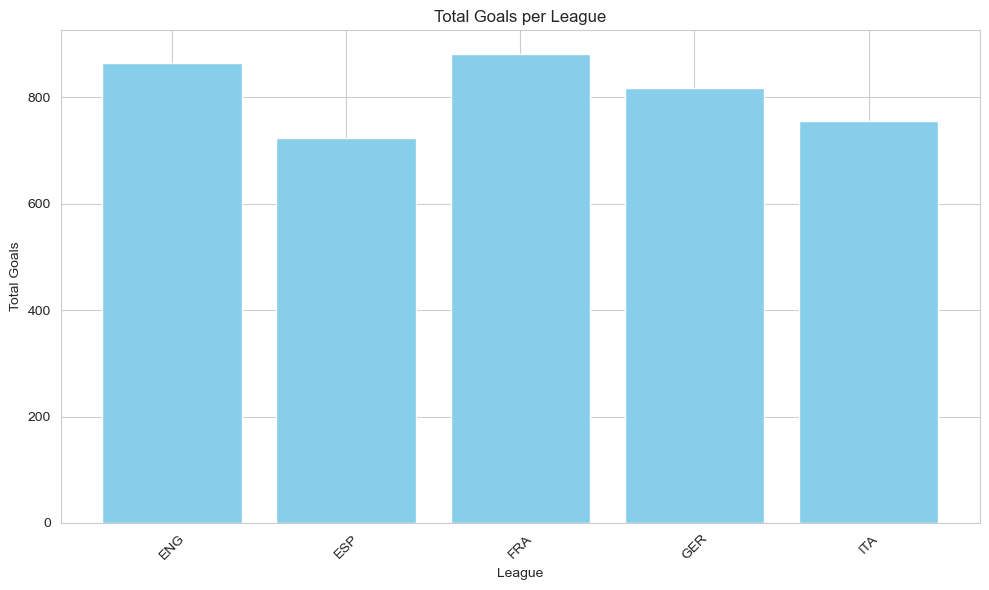

In [18]:
total_goals = teamStatsDf.groupby('Country')['GF'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(total_goals['Country'], total_goals['GF'], color='skyblue')
ax.set_xlabel('League')
ax.set_ylabel('Total Goals')
ax.set_title('Total Goals per League')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


# 2.6: what are the best team scorers per league ? 

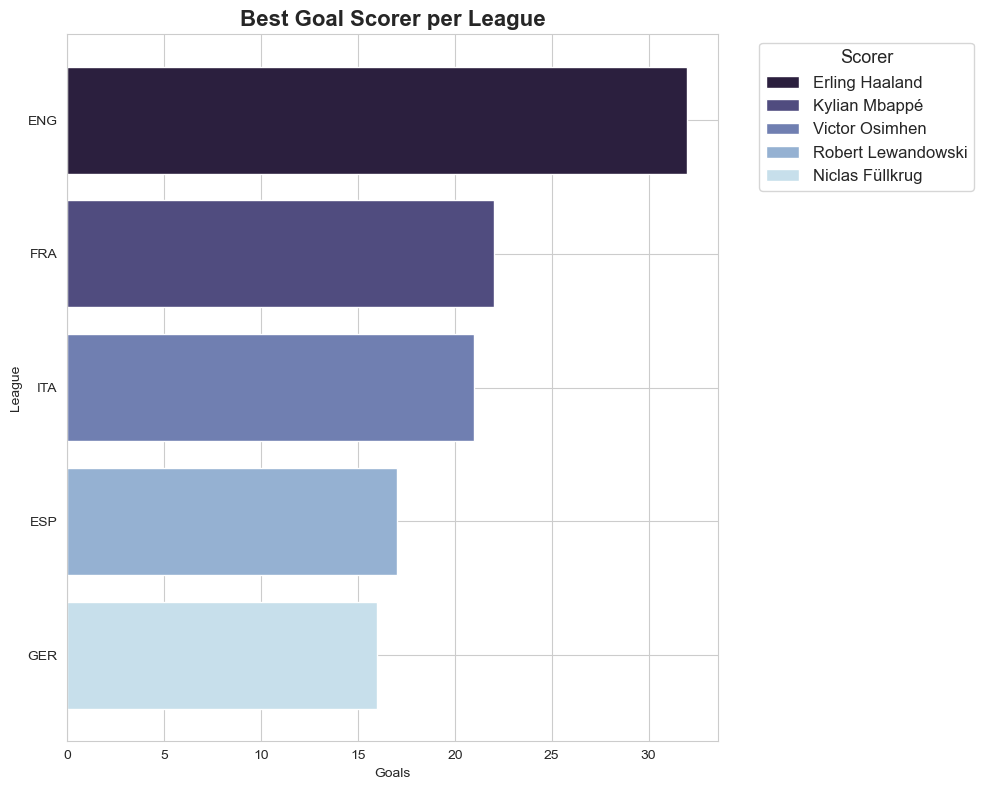

In [19]:
teamStatsDf[['Scorer', 'Goals']] = teamStatsDf['Top Team Scorer'].str.split(' - ', expand=True)
teamStatsDf['Goals'] = teamStatsDf['Goals'].astype(int)
best_scorers_per_league = teamStatsDf.loc[teamStatsDf.groupby('Country')['Goals'].idxmax()]
best_scorers_per_league = best_scorers_per_league.sort_values(by='Goals', ascending=True)


colors = sns.color_palette("ch:s=.25,rot=-.25", n_colors=5)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

for index, (i, row) in enumerate(best_scorers_per_league.iterrows()):
    plt.barh(row['Country'], row['Goals'], color=colors[index], label=row['Scorer'])

plt.xlabel('Goals')
plt.ylabel('League')
plt.title('Best Goal Scorer per League', fontsize=16, fontweight='bold')

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
plt.legend(handles, labels, title='Scorer', title_fontsize='13', fontsize='12', loc='best', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()


# 3 : now let's move on to the players dataset

lets first see how is our data partitioned : 

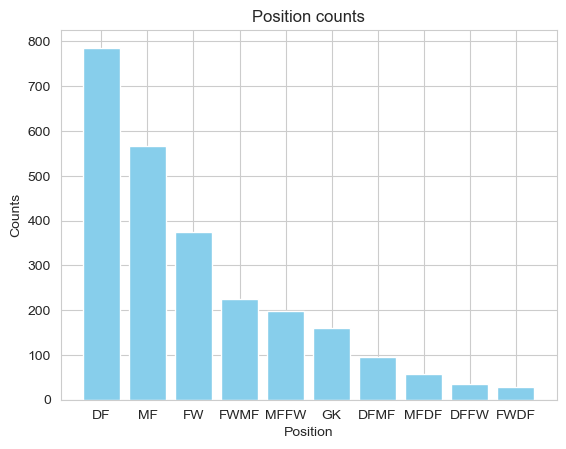

In [20]:
positions_counts = playerStatsDf["Pos"].value_counts()
plt.bar(positions_counts.index, positions_counts.values,color='skyblue')
plt.title("Position counts")
plt.xlabel("Position")
plt.ylabel("Counts")
plt.show()

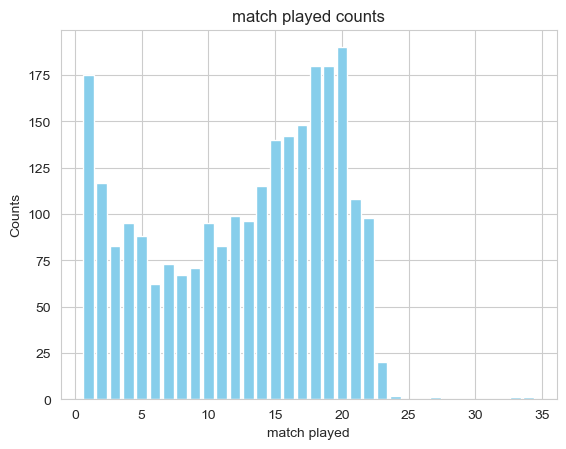

In [21]:
positions_counts = playerStatsDf["MP"].value_counts()
plt.bar(positions_counts.index, positions_counts.values,color='skyblue')
plt.title("match played counts")
plt.xlabel("match played")
plt.ylabel("Counts")
plt.show()

# 3.1 who are the best driblers in the 2022-2023 season ? 

In [22]:
get_feature_meaning("ScaDrib")

'Successful dribbles that lead to a shot attempt'

In [23]:
skill_info = ["SCA", "ScaDrib", "ScaFld", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", "Car3rd", 'CPA', "CarMis", "CarDis", "Fld"]


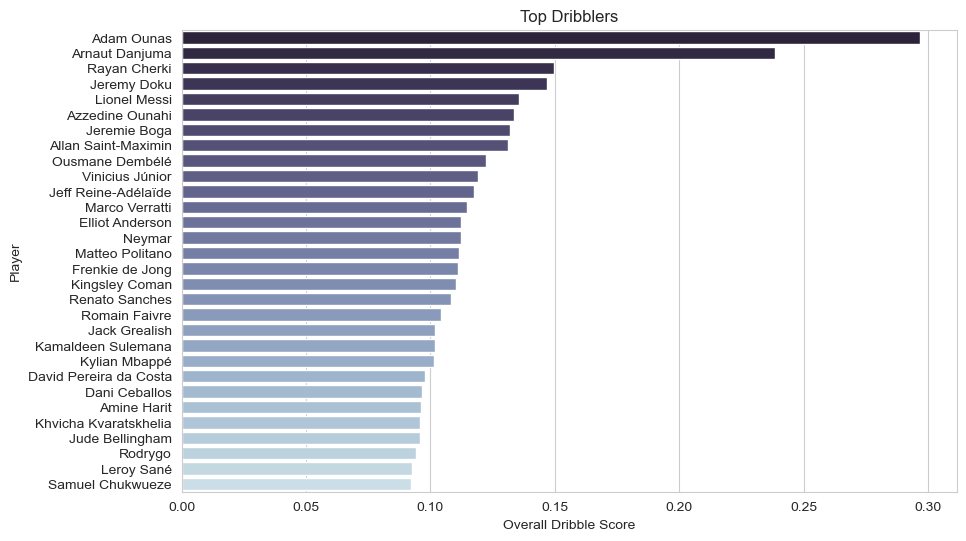

In [24]:
playerRadarDf['dribble_metric'] = playerRadarDf.apply(
    lambda row: (row['CarPrgDist'] + row['ToSuc'] + row['ScaDrib']) * (0.2*(1.5-row['TeamRank'])),
    axis=1
)

top_dribblers_df = playerRadarDf[playerRadarDf['Pos'].isin(['MFFW', 'MF','FWMF','FW'])]

top_dribblers_df = top_dribblers_df.sort_values(by='dribble_metric', ascending=False)
colors = sns.color_palette("ch:s=.25,rot=-.25", n_colors=30)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(data=top_dribblers_df.head(30), x='dribble_metric', y='Player', palette=colors)

plt.title('Top Dribblers')
plt.xlabel('Overall Dribble Score')
plt.ylabel('Player')
plt.grid(True, axis='x')
plt.show()


# 3.2 : what is the country with the best dribblers ? 

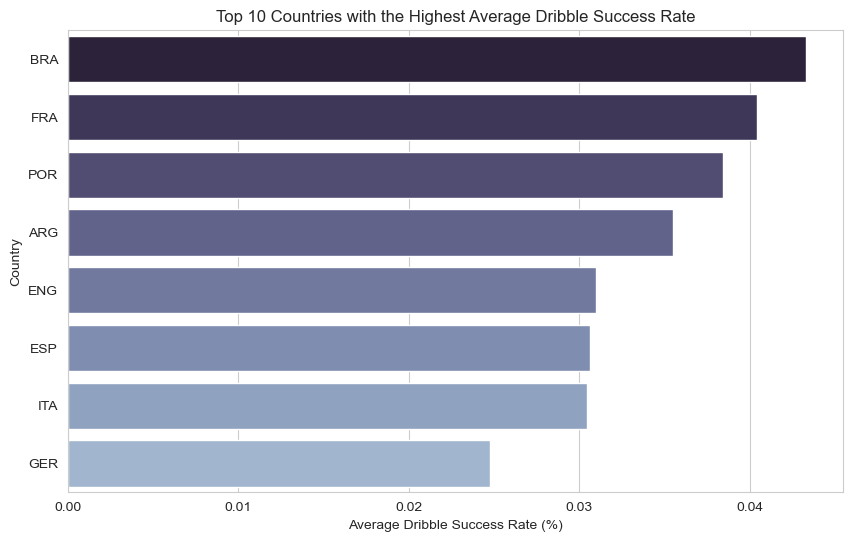

In [25]:
filtered_by_nation = top_dribblers_df.groupby('Nation').filter(lambda x: len(x) >= 20)

country_avg_dribble = filtered_by_nation.groupby('Nation')['dribble_metric'].mean().sort_values(ascending=False).head(10)

colors = sns.color_palette("ch:s=.25,rot=-.25", n_colors=10)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=country_avg_dribble.values, y=country_avg_dribble.index, palette=colors)

plt.title('Top 10 Countries with the Highest Average Dribble Success Rate')
plt.xlabel('Average Dribble Success Rate (%)')
plt.ylabel('Country')
plt.grid(True, axis='x')
plt.show()


# 3.3 : who are the best defensive players of the 2022-2023 season ? 

In [26]:
defense_info = ["Tkl", "TklWon", "TklDri", "Blocks", "Int", "Clr", "Err", "CrdY", "CrdR", "Fls", "OG", "Recov", "AerWon", 
             "AerLost"]

In [27]:
get_feature_meaning("Recov")

'Number of loose balls recovered'

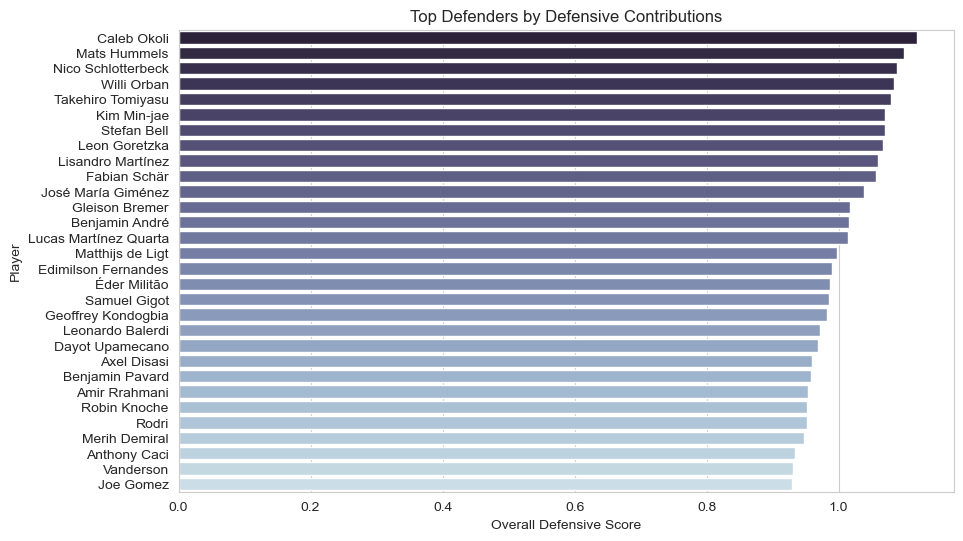

In [28]:
playerRadarDf['defensive_metric'] = playerRadarDf.apply(
    lambda row: (row['TklWon'] + row['Int'] + row['Clr'] + row['Blocks'] + row['Recov'] + row['AerWon'] - row['Fls']) *((1.5-row['TeamRank'])) ,
    axis=1
)

top_defenders_df = playerRadarDf[playerRadarDf['Pos'].isin(['MFDF', 'DF', 'MF'])]

top_defenders_df = top_defenders_df.sort_values(by='defensive_metric', ascending=False)

colors = sns.color_palette("ch:s=.25,rot=-.25", n_colors=30)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(data=top_defenders_df.head(30), x='defensive_metric', y='Player', palette=colors)
plt.title('Top Defenders by Defensive Contributions')
plt.xlabel('Overall Defensive Score')
plt.ylabel('Player')
plt.grid(True, axis='x')
plt.show()

# who are the most physical players of the 2022-2023 season ? 

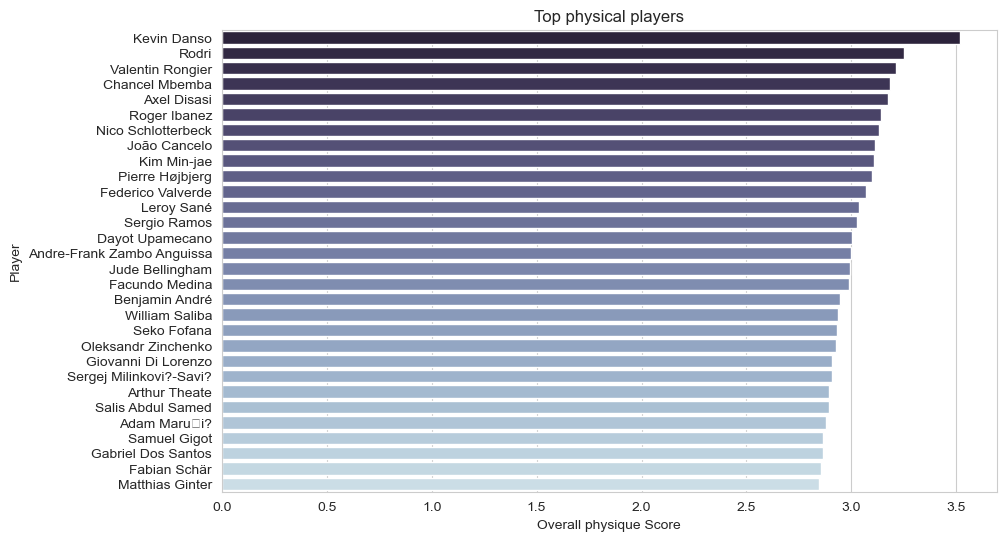

In [29]:
playerRadarDf['physical_metric'] = playerRadarDf.apply(
    lambda row: (row['TklWon'] + row['AerWon%'] + row['CarTotDist'] + row['Min'] )*((2-row['TeamRank'])) ,
    axis=1
)

top_physical_df  = playerRadarDf[playerRadarDf['Pos'].isin(['MFFW', 'DF', 'MF', 'FWMF', 'FW', 'DFFW', 'MFDF', 'DFMF','FWDF'])]

top_physical_df = top_physical_df.sort_values(by='physical_metric', ascending=False)

colors = sns.color_palette("ch:s=.25,rot=-.25", n_colors=30)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(data=top_physical_df.head(30), x='physical_metric', y='Player', palette=colors)
plt.title('Top physical players')
plt.xlabel('Overall physique Score')
plt.ylabel('Player')
plt.grid(True, axis='x')
plt.show()

# who are the players with the best passing in the 2022-2023 season ? 

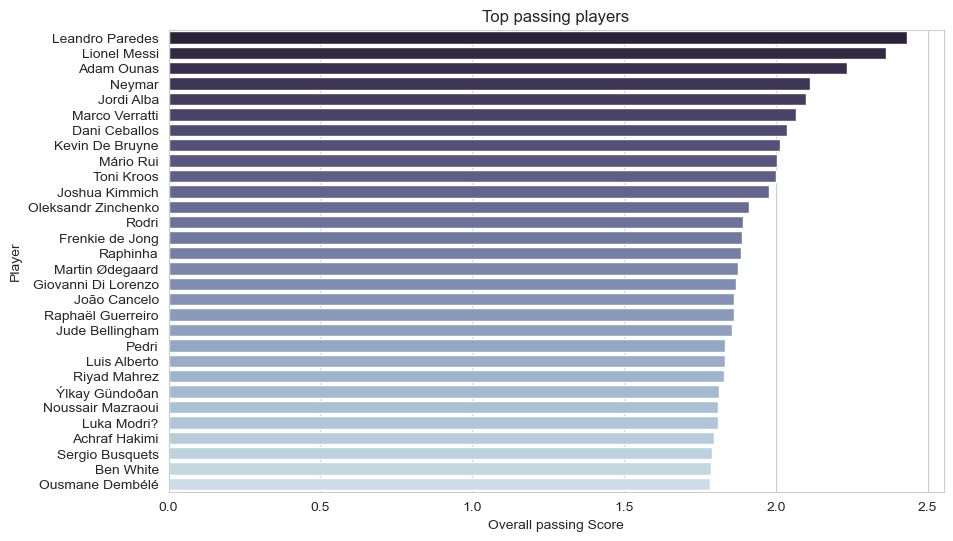

In [30]:
playerRadarDf['passing_metric'] = playerRadarDf.apply(
    lambda row: (2* row['Assists'] + row['PasTotCmp%'] + row['PPA'] + row['GCA'] + row['PasProg'] )*((1.5-row['TeamRank'])) ,
    axis=1
)

top_passing_df  = playerRadarDf[playerRadarDf['Pos'].isin(['MFFW', 'DF', 'MF', 'FWMF', 'FW', 'DFFW', 'MFDF', 'DFMF','FWDF'])]

top_passing_df = top_passing_df.sort_values(by='passing_metric', ascending=False)

colors = sns.color_palette("ch:s=.25,rot=-.25", n_colors=30)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(data=top_passing_df.head(30), x='passing_metric', y='Player', palette=colors)
plt.title('Top passing players')
plt.xlabel('Overall passing Score')
plt.ylabel('Player')
plt.grid(True, axis='x')
plt.show()

# who are the players with the best shooting in the 2022-2023 season ? 

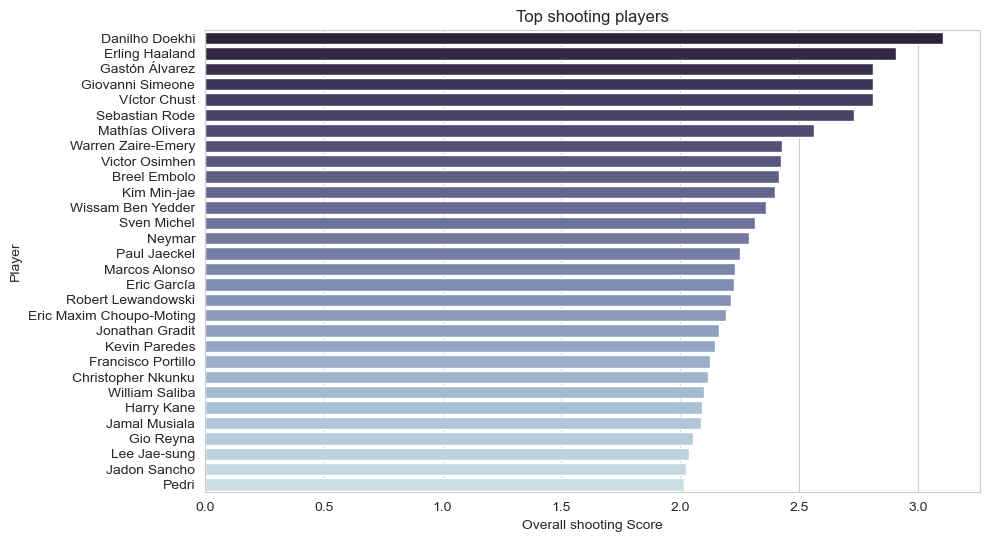

In [31]:
playerRadarDf['shooting_metric'] = playerRadarDf.apply(
    lambda row: (row['G/Sh'] + row['Goals'] + row['Shots'] + row['SoT%'] + row['G/SoT'] *((1.5-row['TeamRank'])) ) ,
    axis=1
)

top_shooting_df  = playerRadarDf[playerRadarDf['Pos'].isin(['MFFW', 'DF', 'MF', 'FWMF', 'FW', 'DFFW', 'MFDF', 'DFMF','FWDF'])]

top_shooting_df = top_shooting_df.sort_values(by='shooting_metric', ascending=False)

colors = sns.color_palette("ch:s=.25,rot=-.25", n_colors=30)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(data=top_shooting_df.head(30), x='shooting_metric', y='Player', palette=colors)
plt.title('Top shooting players')
plt.xlabel('Overall shooting Score')
plt.ylabel('Player')
plt.grid(True, axis='x')
plt.show()

# We will now try to get a photo for every player using beautiful soup and wikipedia

In [39]:
import requests
from bs4 import BeautifulSoup
import os

def find_player_image(player_name):
    base_url = 'https://sofifa.com'  # Base URL of the website
    search_url = f'{base_url}/players'  # URL to send the search request to

    # Step 1: Send search query
    response = requests.get(search_url, params={'keyword': player_name})
    soup = BeautifulSoup(response.text, 'html.parser')
    print(soup)

    # Step 2: Parse for the first player link in search results
    first_link = soup.find('tbody').find('a', href=True)
    if not first_link:
        return None, "No link found"

    # Step 3: Follow the first link
    detail_page_url = base_url + first_link['href']
    detail_response = requests.get(detail_page_url)
    detail_soup = BeautifulSoup(detail_response.text, 'html.parser')

    # Step 4: Find the image on the detail page
    image_tag = detail_soup.find('div', class_='profile clearfix').find('img', {'data-type': 'player'})
    if image_tag and 'data-src' in image_tag.attrs:
        image_url = image_tag['data-src']
        return image_url, None
    return None, "No image found"

def save_image(image_url, player_name):
    if image_url:
        response = requests.get(image_url)
        if response.status_code == 200:
            # Create the directory if it doesn't exist
            os.makedirs('players images', exist_ok=True)
            
            # Define the path for saving the image
            file_path = os.path.join('players images', f"{player_name.replace(' ', '_')}.png")
            
            # Write the image data to a file
            with open(file_path, 'wb') as file:
                file.write(response.content)
            return f"Image saved successfully in {file_path}"
    return "Failed to download the image"

# Example usage
player_name = 'Lionel Messi'
image_url, error = find_player_image(player_name)
if image_url:
    result = save_image(image_url, player_name)
    print(result)
else:
    print(error)


<!DOCTYPE html>

<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Attention Required! | Cloudflare</title>
<meta charset="utf-8"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="noindex, nofollow" name="robots"/>
<meta content="width=device-width,initial-scale=1" name="viewport"/>
<link href="/cdn-cgi/styles/cf.errors.css" id="cf_styles-css" rel="stylesheet"/>
<!--[if lt IE 9]><link rel="stylesheet" id='cf_styles-ie-css' href="/cdn-cgi/styles/cf.errors.ie.css" /><![endif]-->
<style>body{margin:0;padding:0}</style>
<!--[if gte IE 10]><!-->
<script>
  if (!navigator.cookieEnabled) {
    window.addEventListener('DOMContentLoaded', function

AttributeError: 'NoneType' object has no attribute 'find'

In [46]:
import requests
from bs4 import BeautifulSoup
from time import sleep

def setup_session():
    session = requests.Session()
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        'Accept-Language': 'en-US,en;q=0.5',
        'Accept-Encoding': 'gzip, deflate, br',
        'DNT': '1',  # Do Not Track Request Header
        'Connection': 'keep-alive'
    }
    session.headers.update(headers)
    return session

def find_player_image(player_name):
    session = setup_session()
    base_url = 'https://sofifa.com'
    search_url = f'{base_url}/players'

    try:
        response = session.get(search_url, params={'keyword': player_name})
        if response.status_code != 200:
            print("Failed to retrieve search page, status code:", response.status_code)
            return None

        soup = BeautifulSoup(response.text, 'html.parser')
        print(soup.prettify())
        first_link = soup.find('a', href=True)  
        if not first_link:
            print("No links found on the page.")
            return None
        
        print("First link found:", first_link['href'])

        detail_page_url = base_url + first_link['href']
        detail_response = session.get(detail_page_url)
        detail_soup = BeautifulSoup(detail_response.text, 'html.parser')
        image_tag = detail_soup.find('img', {'data-type': 'player'})  # Adjust if necessary
        if image_tag and 'src' in image_tag.attrs:
            return image_tag['src']
        else:
            print("No image found on the player detail page.")
            return None
    except Exception as e:
        print("An error occurred:", str(e))
        return None

# Example usage
player_name = 'neymar'
image_url = find_player_image(player_name)
if image_url:
    print("Image URL:", image_url)
else:
    print("Image could not be retrieved.")


<!DOCTYPE html>
<html class="is-preload dark" data-class="is-preload  dark" id="html" lang="en-US">
 <head id="head">
  <title>
   Players FC 24 Apr 9, 2024 SoFIFA
  </title>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="VGaFvm9Qm-qhCd2LCDi8QKWXNPSrVE2SJ2iT8c3vI1g" name="google-site-verification"/>
  <meta content="FC 24 player ratings on Apr 9, 2024" name="description"/>
  <meta content="2009 - 2024 SoFIFA.com" name="copyright"/>
  <link href="https://static.sofifa.net/launcher-icon.png" rel="shortcut icon"/>
  <link href="https://static.sofifa.net/launcher-icon.png" rel="apple-touch-icon"/>
  <link crossorigin="" href="https://cdn.intergient.com/" rel="preconnect"/>
  <link href="https://cdn.intergient.com/" rel="dns-prefetch"/>
  <script>
   window.ramp = window.ramp || {};window.ramp.que = window.ramp.que || [];
  </script>
  <link href="https://sofifa.com/players?hl=en-US" hreflang="en" rel="alternate"/>
  <link 

In [71]:
import requests
from bs4 import BeautifulSoup
from time import sleep
import os
import time

def download_image(image_url, filename):
    # Ensure the full path for the file
    file_path = os.path.join('players_images', filename)
    print(image_url)

    # Get the image response
    response = requests.get(image_url, stream=True)
    if response.status_code == 200:
        with open(file_path, 'wb') as f:
            for chunk in response.iter_content(1024):
                f.write(chunk)
                time.sleep(0.1)

            return True

        #print(f"Image successfully downloaded to {file_path}")
    else:
        return False
        #print("Failed to download the image")

def setup_session():
    session = requests.Session()
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        'Accept-Language': 'en-US,en;q=0.5',
        'Accept-Encoding': 'gzip, deflate, br',
        'DNT': '1',  # Do Not Track Request Header
        'Connection': 'keep-alive'
    }
    session.headers.update(headers)
    return session

def find_player_image(player_name):
    session = setup_session()
    base_url = 'https://sofifa.com'
    search_url = f'{base_url}/players'

    try:
        response = session.get(search_url, params={'keyword': player_name})
        if response.status_code != 200:
            #print("Failed to retrieve search page, status code:", response.status_code)
            return None

        soup = BeautifulSoup(response.text, 'html.parser')
        
        first_link = soup.find('article').find('table').find('tbody').find('tr').find('a', href=True)
        #print("First link found:", first_link['href'])
        if not first_link:
            #print("No links found in the first table row.")
            return None

        detail_page_url = base_url + first_link['href']
        detail_response = session.get(detail_page_url)
        detail_soup = BeautifulSoup(detail_response.text, 'html.parser')

        image_tag = detail_soup.find('article').find('img')
        #print("Image tag found:", image_tag)
        if image_tag and 'data-src' in image_tag.attrs:
            return image_tag['data-src']
        else:
            #print("No image found on the player detail page.")
            return None
    except Exception as e:
        #print("An error occurred:", str(e))
        return None


if not os.path.exists('players_images'):
    os.makedirs('players_images')  
    
for playerName in playerStatsDf["Player"]:
    image_url = find_player_image(playerName)
    if image_url:
        filename = (f"{playerName}.png")
        if download_image(image_url, filename):
            print(f"Image for {playerName} saved successfully.")
    else:
        print(f"Image for {playerName} could not be retrieved.")



https://cdn.sofifa.net/players/247/361/24_120.png
Image for Brenden Aaronson saved successfully.
https://cdn.sofifa.net/players/206/493/24_120.png
Image for Yunis Abdelhamid saved successfully.
https://cdn.sofifa.net/players/246/297/24_120.png
Image for Himad Abdelli saved successfully.
https://cdn.sofifa.net/players/252/059/24_120.png
Image for Salis Abdul Samed saved successfully.


KeyboardInterrupt: 